In [5]:
import pandas as pd

In [6]:
t1 = pd.read_excel("data/00 data de criação.xlsx", sheet_name='Relatório de Negócios personali')

t2 = pd.read_excel("data/01 negocios criados.xlsx", sheet_name='Contagem de Negócios   Todos os')

t3 = pd.read_excel("data/02 agendamentos.xlsx", sheet_name='Contagem de Negócios   Agendame')

t4 = pd.read_excel("data/03 agendamentos aceitos.xlsx", sheet_name='Contagem de Negócios   Agendame')

t5 = pd.read_excel("data/04 diagnóstico.xlsx", sheet_name='Contagem de Negócios   Diagnóst')

t6 = pd.read_excel("data/05 proposta.xlsx", sheet_name='Contagem de Negócios   Proposta')

t7 = pd.read_excel("data/06 cliente.xlsx", sheet_name='Contagem de Negócios   Cliente ')



c:\Users\levy\miniconda3\envs\fuzzy\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\levy\miniconda3\envs\fuzzy\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\levy\miniconda3\envs\fuzzy\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\levy\miniconda3\envs\fuzzy\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\levy\miniconda3\envs\fuzzy\lib\site-packages\openpyxl\s

In [7]:
t1.shape, t2.shape, t3.shape, t4.shape, t5.shape, t6.shape, t7.shape

((175, 5), (146, 6), (140, 6), (123, 6), (53, 6), (28, 6), (7, 6))

In [8]:
# see if there is someone that is on the t2 and not on the t1, by 'Nome do negócio'

t2[~t2['Record ID'].isin(t1['Record ID'])]

,Record ID,Nome do negócio,Valor na moeda da empresa,Etapa do negócio,Data de fechamento,Pipeline


In [9]:
t1_t2 = t1.merge(t2, on='Record ID', how='left')
t1_t2.shape

(175, 10)

In [10]:
t1_t2 = t1_t2.rename(columns={
    'Nome do negócio_x': 'Nome do negócio',
    'Etapa do negócio_x': 'Etapa do negócio',
    'Valor na moeda da empresa_x': 'Valor na moeda da empresa',
    'Nome do negócio_y':'flag_corresponde_1',
}).assign(flag_corresponde_1 = lambda df_: df_['flag_corresponde_1'].notnull().map({True: "Sim", False: "Nao"}))\
    .drop(columns=['Valor na moeda da empresa_y', 'Etapa do negócio_y'])

In [11]:
t1_t2.sample(10)

,Record ID,Nome do negócio,Valor na moeda da empresa,Etapa do negócio,Data de criação,flag_corresponde_1,Data de fechamento,Pipeline
98,8784596653,Valmont,NaN,Negócio perdido,2022-05-02 11:54:40.784,Sim,2022-05-17 16:42:10.664,Enterprise - Macfor Dealflow
122,8235144739,Porto Itapoá,445722.96,Proposta Enviada (SQL),2022-03-15 22:01:14.420,Sim,2022-08-24 11:12:49.404,Enterprise - Macfor Dealflow
95,8860080758,Iquegami Supermercados,NaN,Negócio perdido,2022-05-09 17:09:30.438,Sim,NaT,Enterprise - Macfor Dealflow
79,9320851333,Sonda Supermercados,NaN,Negócio perdido,2022-06-27 15:17:04.231,Sim,2022-08-10 13:43:28.164,Enterprise - Macfor Dealflow
38,10288664398,Evera by Citrosuco,463387.59,Cliente,2022-09-16 11:47:08.218,Sim,2022-11-11 11:34:05.730,Enterprise - Macfor Dealflow
135,8169055888,UnidaSul,NaN,Negócio perdido,2022-03-08 18:23:16.683,Sim,2022-05-17 16:42:45.972,Enterprise - Macfor Dealflow
39,10194908756,CBC,NaN,Negócio perdido,2022-09-15 11:54:23.706,Sim,2023-01-20 16:27:52.252,Enterprise - Macfor Dealflow
157,7846319660,Citrosuco,717721.20,Cliente,2022-02-07 15:52:14.906,Sim,2022-07-14 12:07:59.326,Enterprise - Macfor Dealflow
83,9145229174,Ayumi Supermercados,NaN,Negócio perdido,2022-06-09 18:22:51.539,Sim,2022-08-10 13:39:49.290,Enterprise - Macfor Dealflow
9,11067648141,Agua de cheiro,NaN,Negócio perdido,2022-11-23 18:01:02.145,Sim,2022-11-30 18:00:41.706,Enterprise - Macfor Dealflow


In [12]:

# t1_t2['Data de fechamento'].fillna('Não fechado', inplace=True)

t1_t2_t3 = t1_t2.merge(t3, on='Record ID', how='left')\
    .rename(columns={
        'Nome do negócio_x': 'Nome do negócio',
        'Valor na moeda da empresa_x': 'Valor na moeda da empresa',
        'Etapa do negócio_x': 'Etapa do negócio',
        'Data de fechamento_x': 'Data de fechamento',
        'Nome do negócio_y': 'flag_corresponde_2',
        'Pipeline_x': 'Pipeline',
    })\
        .assign(flag_corresponde_2 = lambda df_: df_['flag_corresponde_2'].notnull().map({True: "Sim", False: "Nao"}))\
            .drop(columns=['Valor na moeda da empresa_y', 'Etapa do negócio_y', 'Data de fechamento_y', 'Pipeline_y'])

In [13]:
t1_t2_t3_t4 = t1_t2_t3.merge(t4, on='Record ID', how='left')\
    .rename(columns={
        'Nome do negócio_x': 'Nome do negócio',
        'Valor na moeda da empresa_x': 'Valor na moeda da empresa',
        'Etapa do negócio_x': 'Etapa do negócio',
        'Data de fechamento_x': 'Data de fechamento',
        'Nome do negócio_y': 'flag_corresponde_3',
        'Pipeline_x': 'Pipeline',
    }).assign(flag_corresponde_3 = lambda df_: df_['flag_corresponde_3'].notnull().map({True: "Sim", False: "Nao"}))\
    .drop(columns=['Valor na moeda da empresa_y', 'Etapa do negócio_y', 'Data de fechamento_y', 'Pipeline_y'])

In [14]:
t1_t2_t3_t4_t5 = t1_t2_t3_t4.merge(t5, on='Record ID', how='left')\
    .rename(columns={
        'Nome do negócio_x': 'Nome do negócio',
        'Valor na moeda da empresa_x': 'Valor na moeda da empresa',
        'Etapa do negócio_x': 'Etapa do negócio',
        'Data de fechamento_x': 'Data de fechamento',
        'Nome do negócio_y': 'flag_corresponde_4',
        'Pipeline_x': 'Pipeline',
    }).assign(flag_corresponde_4 = lambda df_: df_['flag_corresponde_4'].notnull().map({True: "Sim", False: "Nao"}))\
    .drop(columns=['Valor na moeda da empresa_y', 'Etapa do negócio_y', 'Data de fechamento_y', 'Pipeline_y'])

In [15]:
t1_t2_t3_t4_t5_t6 = t1_t2_t3_t4_t5.merge(t6, on='Record ID', how='left')\
    .rename(columns={
        'Nome do negócio_x': 'Nome do negócio',
        'Valor na moeda da empresa_x': 'Valor na moeda da empresa',
        'Etapa do negócio_x': 'Etapa do negócio',
        'Data de fechamento_x': 'Data de fechamento',
        'Nome do negócio_y': 'flag_corresponde_5',
        'Pipeline_x': 'Pipeline',
    }).assign(flag_corresponde_5 = lambda df_: df_['flag_corresponde_5'].notnull().map({True: "Sim", False: "Nao"}))\
    .drop(columns=['Valor na moeda da empresa_y', 'Etapa do negócio_y', 'Data de fechamento_y', 'Pipeline_y'])

In [16]:
t1_t2_t3_t4_t5_t6_t7 = t1_t2_t3_t4_t5_t6.merge(t7, on='Record ID', how='left')\
    .rename(columns={
        'Nome do negócio_x': 'Nome do negócio',
        'Valor na moeda da empresa_x': 'Valor na moeda da empresa',
        'Etapa do negócio_x': 'Etapa do negócio',
        'Data de fechamento_x': 'Data de fechamento',
        'Nome do negócio_y': 'flag_corresponde_6',
        'Pipeline_x': 'Pipeline',
    }).assign(flag_corresponde_6 = lambda df_: df_['flag_corresponde_6'].notnull().map({True: "Sim", False: "Nao"}))\
    .drop(columns=['Valor na moeda da empresa_y', 'Etapa do negócio_y', 'Data de fechamento_y', 'Pipeline_y'])

In [17]:
t1_t2_t3_t4_t5_t6_t7.sample(10)

,Record ID,Nome do negócio,Valor na moeda da empresa,Etapa do negócio,Data de criação,flag_corresponde_1,Data de fechamento,Pipeline,flag_corresponde_2,flag_corresponde_3,flag_corresponde_4,flag_corresponde_5,flag_corresponde_6
29,10358562966,New Holland - Construction,NaN,Diagnóstico,2022-09-29 15:53:39.702,Sim,NaT,Enterprise - Macfor Dealflow,Sim,Sim,Sim,Nao,Nao
119,8261350969,Club Men Cosmetics,NaN,Negócio perdido,2022-03-18 10:59:41.597,Nao,NaT,NaN,Nao,Nao,Nao,Nao,Nao
94,8868515513,Grupo Zanetti,NaN,Negócio perdido,2022-05-10 09:51:11.689,Nao,NaT,NaN,Nao,Nao,Nao,Nao,Nao
89,8988575343,Gillette Venus,NaN,Negócio perdido,2022-05-23 16:10:24.285,Sim,NaT,Enterprise - Macfor Dealflow,Sim,Sim,Nao,Nao,Nao
172,7588932696,Fractal,NaN,Agendamentos Aceitos (SAL),2022-01-12 14:13:47.337,Nao,NaT,NaN,Nao,Nao,Nao,Nao,Nao
21,10630221896,Wiley,NaN,Negócio perdido,2022-10-20 09:43:11.731,Sim,2022-10-31 09:41:33.477,Enterprise - Macfor Dealflow,Sim,Nao,Nao,Nao,Nao
105,8510171833,Calçados Bibi,NaN,Negócio perdido,2022-04-04 13:44:11.695,Sim,2023-01-20 16:27:33.675,Enterprise - Macfor Dealflow,Sim,Sim,Sim,Nao,Nao
147,7992382761,Donizete Distribuidora,NaN,Negócio perdido,2022-02-22 11:31:02.475,Sim,2022-04-28 14:26:42.825,Enterprise - Macfor Dealflow,Sim,Sim,Nao,Nao,Nao
127,8218762164,Medabil,NaN,Negócio perdido,2022-03-14 11:21:54.566,Sim,2022-04-20 12:14:30.263,Enterprise - Macfor Dealflow,Sim,Sim,Nao,Nao,Nao
87,9059767372,Zenatur,NaN,Negócio perdido,2022-05-31 16:06:50.260,Sim,2022-08-10 13:41:38.029,Enterprise - Macfor Dealflow,Sim,Sim,Sim,Nao,Nao


In [18]:
t1_t2_t3_t4_t5_t6_t7 = t1_t2_t3_t4_t5_t6_t7\
    .assign(**{"Nome do negócio": lambda df_: df_['Nome do negócio'].str.strip()})\
    .rename(
    columns={
        'flag_corresponde_1': 'Negocios_Criados',
        'flag_corresponde_2': 'Agendamentos',
        'flag_corresponde_3': 'Agendamento_Aceito',
        'flag_corresponde_4': 'Diagnostico',
        'flag_corresponde_5': 'Proposta',
        'flag_corresponde_6': 'Cliente',
    }
)

In [19]:
t1_t2_t3_t4_t5_t6_t7.loc[t1_t2_t3_t4_t5_t6_t7['Nome do negócio'] == "Zen SA"]

,Record ID,Nome do negócio,Valor na moeda da empresa,Etapa do negócio,Data de criação,Negocios_Criados,Data de fechamento,Pipeline,Agendamentos,Agendamento_Aceito,Diagnostico,Proposta,Cliente
25,10590690171,Zen SA,NaN,Negócio perdido,2022-10-17 09:55:59.878,Sim,NaT,Enterprise - Macfor Dealflow,Sim,Sim,Nao,Nao,Nao


In [20]:
t1_t2_t3_t4_t5_t6_t7['ultima_etapa'] = t1_t2_t3_t4_t5_t6_t7[['Negocios_Criados','Agendamentos', 'Agendamento_Aceito', 'Diagnostico', 'Proposta', 'Cliente']].apply(
    lambda row: next((coluna for coluna in ['Cliente', 'Proposta', 'Diagnostico', 'Agendamento_Aceito', 'Agendamentos', 'Negocios_Criados'] if row[coluna] == 'Sim'), 'Contato'), axis=1)

In [21]:
t1_t2_t3_t4_t5_t6_t7.loc[:, ['Nome do negócio', 'ultima_etapa']].sample(10)

,Nome do negócio,ultima_etapa
158,Buonny,Agendamento_Aceito
50,Grupo Líder,Proposta
92,Ascensus Group,Contato
114,Phio care,Contato
8,Grupo ATTO,Agendamentos
10,Rennova,Agendamento_Aceito
155,Grupo Barcelos,Agendamento_Aceito
135,UnidaSul,Agendamento_Aceito
143,MRS II,Proposta
17,Hospital Alemão Oswaldo Cruz,Agendamento_Aceito


In [22]:
t1_t2_t3_t4_t5_t6_t7.to_csv("dados_agregados.csv", index=False)

In [23]:
# motivo da perda (motivo de fechamento perdido) - negocio
# receita - valor - acv



In [24]:
empresas = pd.read_csv("data/empresas.csv")

negocios = pd.read_csv("data/negocios.csv")

negocios = negocios.loc[:, ['Record ID', 'Nome do negócio', 'Valor', 'Valor do contrato anual', 'Motivo de fechamento perdido']]\
.assign(**{'Nome do negócio': lambda df: df['Nome do negócio'].str.upper()})

empresas = empresas.dropna(subset=['Nome da empresa'])
empresas = empresas.loc[:, ['Record ID', 'Nome da empresa', 'Setor']]

empresas = empresas.assign(**{
    'Nome da empresa': lambda df_: df_['Nome da empresa'].str.strip()
})
empresas['Nome da empresa'] = empresas['Nome da empresa'].str.upper()

In [80]:
funil_negocios = t1_t2_t3_t4_t5_t6_t7.merge(negocios, on='Record ID', how='left')\
    .rename(columns={
        'Nome do negócio_x': 'Nome do negócio',
        })\
    .drop(columns=['Nome do negócio_y'])\
    .assign(**{'Nome do negócio': lambda df: df['Nome do negócio'].str.upper()})


results = fpd.fuzzy_merge(funil_negocios, empresas, left_on='Nome do negócio', right_on='Nome da empresa',
                          join='left-outer',
                          method = 'levenshtein', threshold = 0.85)
    # .merge(empresas.assign(**{'Nome da empresa': lambda df: df['Nome da empresa'].str.upper()}), left_on='Nome do negócio', right_on='Nome da empresa', how='left')\
    # .rename(columns={
    #     'Record ID_x': "Record ID"
    # })\
    # .loc[:, ['Record ID', 'Nome do negócio', 'Data de criação', 'Data de fechamento', 'ultima_etapa', 'Valor', 'Valor do contrato anual', 'Motivo de fechamento perdido', 'Setor']]


print("Found", results.shape)
results.sample(15)

Found (181, 20)


,Record ID,Nome do negócio,Valor na moeda da empresa,Etapa do negócio,Data de criação,Negocios_Criados,Data de fechamento,Pipeline,Agendamentos,Agendamento_Aceito,Diagnostico,Proposta,Cliente,ultima_etapa,Valor,Valor do contrato anual,Motivo de fechamento perdido,Record ID,Nome da empresa,Setor
141,10277598247,NEGÓCIO ENEL X - GIOVANNA,NaN,Agendamentos (MQL),2022-09-22 15:04:17.174,Sim,NaT,Enterprise - Macfor Dealflow,Nao,Nao,Nao,Nao,Nao,Negocios_Criados,NaN,NaN,NaN,,,
74,8509054492,LEÃO ALIMENTOS E BEBIDAS,NaN,Negócio perdido,2022-04-04 12:30:25.994,Sim,NaT,Enterprise - Macfor Dealflow,Sim,Sim,Sim,Sim,Nao,Proposta,NaN,NaN,Saiu da Empresa; Timing; Desinteresse/Declinou,6782472310,LEÃO ALIMENTOS E BEBIDAS,NaN
70,8808339045,NIM GENETICS,217872.00,Cliente,2022-05-02 00:00:00.000,Sim,2022-07-04 19:01:50.708,Enterprise - Macfor Dealflow,Sim,Sim,Sim,Sim,Sim,Cliente,217872.00,NaN,NaN,8599777825,NIMGENETICS,Biotecnologia
179,7751338290,COMITÊ INTERNACIONAL DA CRUZ VERMELHA,1013610.24,Negócio perdido,2022-01-28 10:32:17.905,Sim,2022-03-02 14:41:49.977,Enterprise - Macfor Dealflow,Sim,Nao,Nao,Nao,Nao,Agendamentos,1013610.24,NaN,Financeiro,,,
89,8239766660,SHOPPING RECIFE,NaN,Negócio perdido,2022-03-16 10:16:21.584,Sim,2022-04-20 12:14:17.518,Enterprise - Macfor Dealflow,Sim,Sim,Nao,Nao,Nao,Agendamento_Aceito,NaN,NaN,Maturação; Não é ICP; Timing,6338188098,SHOPPING RECIFE,Varejo
97,8195134813,HOSPITAL ERNESTO DORNELLES,NaN,Negócio perdido,2022-03-11 09:59:25.417,Sim,2022-05-09 15:35:36.338,Enterprise - Macfor Dealflow,Sim,Sim,Nao,Nao,Nao,Agendamento_Aceito,NaN,NaN,Não é ICP; Nós Declinamos,5831834285,HOSPITAL ERNESTO DORNELLES,Hospital e cuidados de saúde
152,9767065765,DIGIO - UPSELL III,9142.10,Negócio perdido,2022-08-09 09:24:29.102,Sim,2022-08-31 09:24:13.535,Enterprise - Macfor Dealflow,Sim,Sim,Sim,Sim,Nao,Proposta,9142.10,NaN,Desinteresse/Declinou,,,
137,10554387775,LOJA COCAMAR,NaN,Diagnóstico,2022-10-13 15:27:27.275,Sim,NaT,Enterprise - Macfor Dealflow,Sim,Sim,Sim,Nao,Nao,Diagnostico,NaN,NaN,NaN,,,
2,11234907490,FINTECHMAGALU,NaN,Negócio perdido,2022-12-06 10:03:04.872,Sim,2022-12-31 10:02:04.798,Enterprise - Macfor Dealflow,Nao,Nao,Nao,Nao,Nao,Negocios_Criados,NaN,NaN,Não é ICP,10202350229,FINTECHMAGALU,NaN
17,10677021007,ACCOR,NaN,Negócio perdido,2022-10-24 16:35:41.004,Sim,NaT,Enterprise - Macfor Dealflow,Sim,Sim,Nao,Nao,Nao,Agendamento_Aceito,NaN,NaN,Desinteresse/Declinou; Financeiro,5984105351,ACCOR,Hotelaria


In [75]:
empresas.loc[empresas['Nome da empresa'].str.contains("FRACTAL")]

,Record ID,Nome da empresa,Setor
816,7685774682,FRACTAL TECNOLOGIA,NaN


In [74]:
negocios.loc[negocios['Nome do negócio'].str.contains("FRACTAL")]

,Record ID,Nome do negócio,Valor,Valor do contrato anual,Motivo de fechamento perdido


In [29]:
t1_t2_t3_t4_t5_t6_t7

t1_t2_t3_t4_t5_t6_t7.loc[t1_t2_t3_t4_t5_t6_t7['Nome do negócio'].str.contains("Retorno")]

,Record ID,Nome do negócio,Valor na moeda da empresa,Etapa do negócio,Data de criação,Negocios_Criados,Data de fechamento,Pipeline,Agendamentos,Agendamento_Aceito,Diagnostico,Proposta,Cliente,ultima_etapa
1,11370793629,Eurochem (Retorno),NaN,Agendamentos Aceitos (SAL),2022-12-15 15:45:51.903,Sim,2022-12-31 15:45:35.358,Enterprise - Macfor Dealflow,Sim,Sim,Nao,Nao,Nao,Agendamento_Aceito


In [58]:
results.to_excel("funil_negocios_2022.xlsx", index=False)

In [57]:
results.to_csv("resultados.csv", index=False, sep=',')

In [67]:
serie_dividida = results['Motivo de fechamento perdido'].fillna('Desconhecido').str.split(';')

# Crie uma nova série com cada motivo em uma linha separada
nova_serie = pd.Series([motivo.strip() for motivos in serie_dividida for motivo in motivos])



<Axes: >

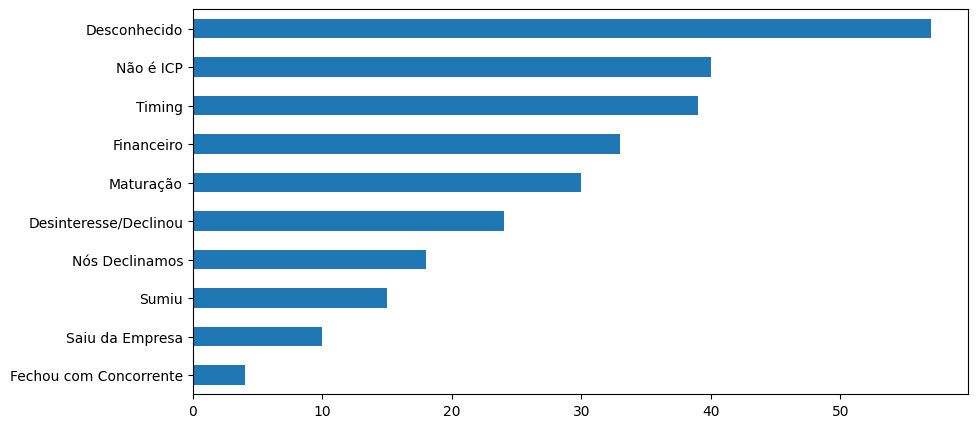

In [73]:
nova_serie.value_counts().sort_values().plot(kind='barh', figsize=(10, 5))